In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=sns.load_dataset(r"iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data cleaning Steps

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data Visualization

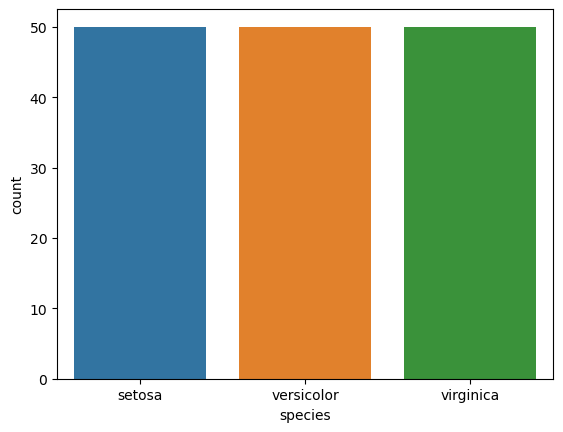

In [36]:
sns.countplot(df,x='species')
plt.show()

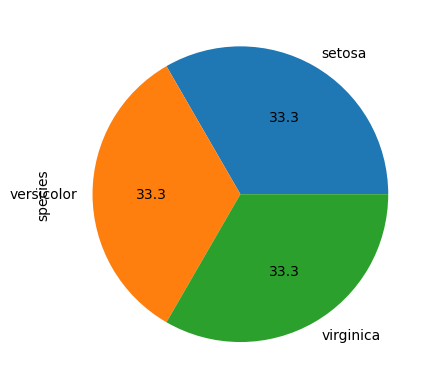

In [41]:
x=df['species'].value_counts()
x.plot(kind='pie',autopct='%1.1f')
plt.show()

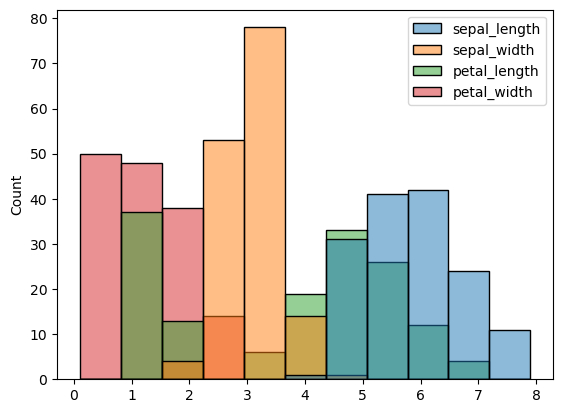

In [10]:
sns.histplot(df)
plt.show()

<Axes: ylabel='Density'>

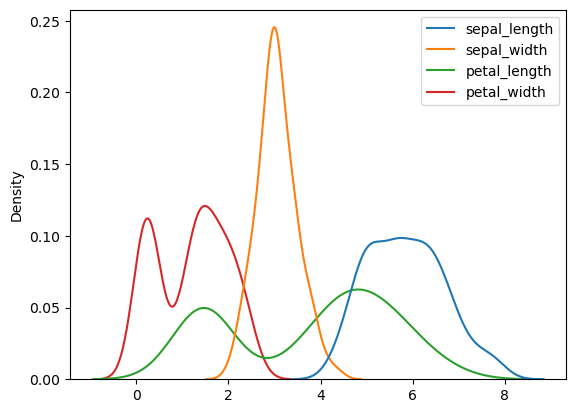

In [46]:
sns.kdeplot(df[['sepal_length','sepal_width','petal_length','petal_width']])

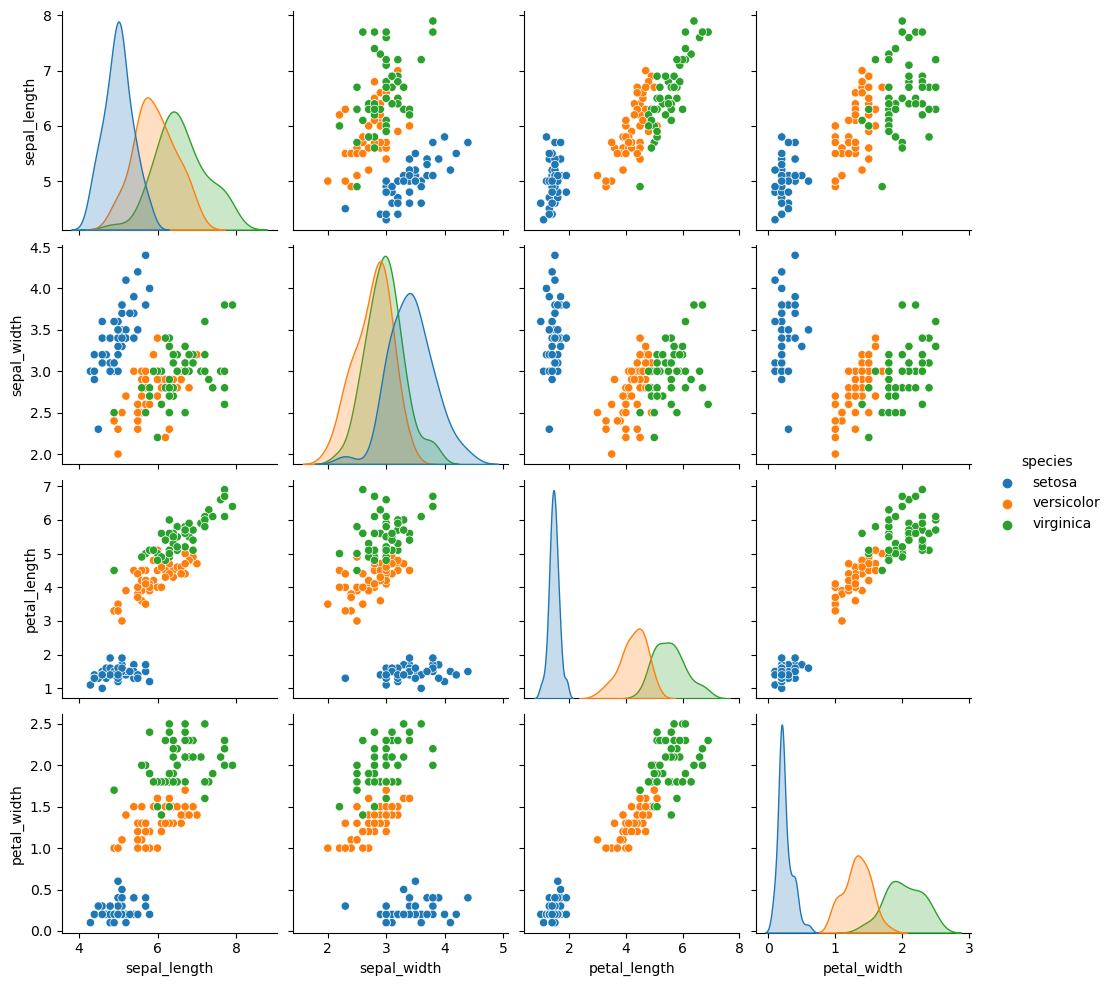

In [42]:
sns.pairplot(df,hue='species')
plt.show()

C:\Users\situ\AppData\Local\Temp\ipykernel_13984\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


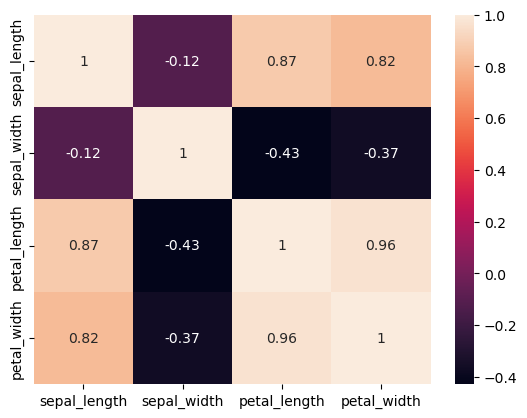

In [43]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Ml Approach 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,consensus_score

In [14]:
sc=StandardScaler()
gn=GaussianNB()
rc=RandomForestClassifier()
s=SVC()

In [15]:
y=df['species']
x=df.drop(columns='species')

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [17]:
xtrain.shape,xtest.shape,len(ytrain),len(ytest)

((120, 4), (30, 4), 120, 30)

# Preprocessing

In [18]:
xtrainsc=sc.fit_transform(xtrain)
xtestsc=sc.fit_transform(xtest)

In [19]:
xtrainsc.shape,xtestsc.shape

((120, 4), (30, 4))

# Model Bulding


In [20]:
gn.fit(xtrainsc,ytrain)

GaussianNB()

In [21]:
ypred=gn.predict(xtestsc)

In [22]:
accuracy_score(ytest,ypred)

0.9333333333333333

In [23]:
cm=confusion_matrix(ytest,ypred)
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  9]], dtype=int64)

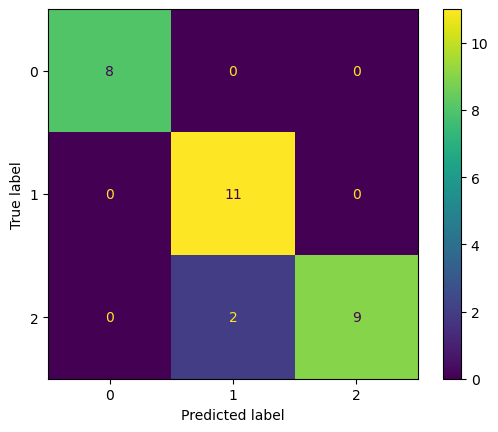

In [24]:
cm=ConfusionMatrixDisplay(cm)
cm.plot()

# Random Forest

In [25]:
rc.fit(xtrainsc,ytrain)

RandomForestClassifier()

In [26]:
ypre=rc.predict(xtestsc)

In [27]:
accuracy_score(ytest,ypre)

0.9

In [28]:
cm=confusion_matrix(ytest,ypre)
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  3,  8]], dtype=int64)

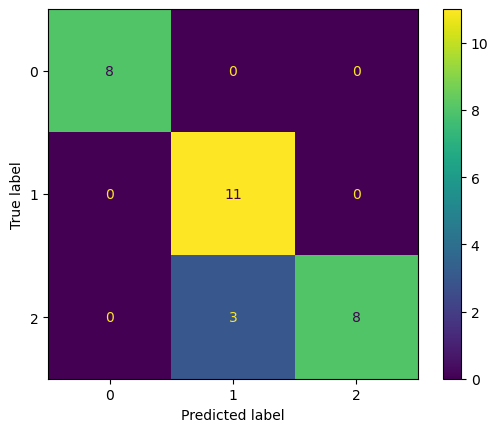

In [29]:
cm=ConfusionMatrixDisplay(cm)
cm.plot()

# SVC

In [30]:
s.fit(xtrainsc,ytrain)

SVC()

In [31]:
yprei=s.predict(xtestsc)

In [32]:
accuracy_score(ytest,yprei)

0.9

In [33]:
cm=confusion_matrix(ytest,yprei)
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  3,  8]], dtype=int64)

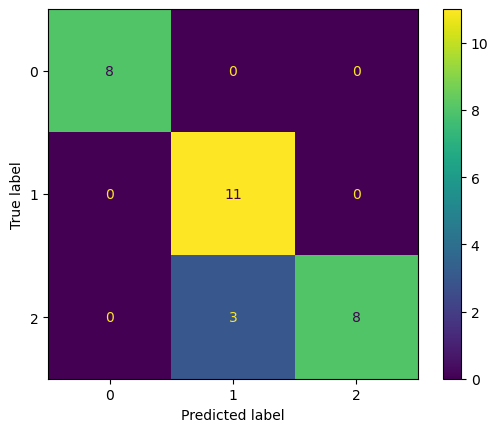

In [34]:
cm=ConfusionMatrixDisplay(cm)
cm.plot()